# Week 1 Challenge


## Problem

The objective of this challenge is to accurately predict whether a student will drop out or not. 

## Metric
The performance measure that will be used to judge will be the F1 measure.

The evaluation metric for this challenge is Mean F1-Score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favoured over extremely good performance on one and poor performance on the other.. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

## Data description
The data has been split into two groups:

- training set (train_data_week_1_challenge.csv)
- test set (test_data_week_1_challenge.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each student. Your model will be based on “features” like gender, caste   mathematics marks etc. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each student. It is your job to predict these outcomes. For each student in the test set, use the model you trained to predict whether or not they drop.

** NOTE: You need to encode the target variable with the following codeing:
- continue => 1
- drop     => 0

You will only need to submit the prediction label from the test set in .npy format.



# Problem Solution.

## 1. Data exploration 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the train set and store them into variable named " data "
data= pd.read_csv('data/train_data_week_1_challenge.csv')
data.head(2)

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0


In [3]:
data.shape

(17190, 15)

In [4]:
data.columns

Index(['continue_drop', 'student_id', 'gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet', 'school_id',
       'total_students', 'total_toilets', 'establishment_year'],
      dtype='object')

In [5]:
data=data.replace({'continue':1,'drop':0})

In [6]:
data['caste'].unique()

array(['BC', 'ST', 'SC', 'OC'], dtype=object)

In [7]:
data=data.replace({'F':1,'M':0})

In [8]:
data=data.replace({'other':0,'father':1,'mother':2,'mixed':3})

In [9]:
data=data.replace({'True':1,'False':0})

In [10]:
data=data.replace({'BC':0,'ST':1,'SC':2,'OC':3})

In [11]:
data=data.replace({True:1,False:0})

In [12]:
x=data.corr()
x['continue_drop'].sort_values(ascending=False)

continue_drop         1.000000
caste                 0.038462
guardian              0.033059
languages_teacher     0.018842
science_marks         0.007258
mathematics_marks     0.007258
school_id             0.000396
establishment_year   -0.000519
total_students       -0.005051
total_toilets        -0.009832
gender               -0.043430
internet             -0.060419
english_marks        -0.073242
science_teacher      -0.127864
Name: continue_drop, dtype: float64

In [13]:
#total number of data in the datafreme
data.size

257850

In [14]:
data.drop(['student_id'],axis=1,inplace=True)

In [15]:
# regarding all features below 1% of correlation 
#have less ocntribution on the students drop out

data.drop(['science_marks','mathematics_marks','school_id','establishment_year','total_students','total_toilets'], axis=1 ,inplace=True)
data.head()

,continue_drop,gender,caste,english_marks,science_teacher,languages_teacher,guardian,internet
0,1,0,0,0.468,7,6,0,1
1,1,0,0,0.420,8,10,2,0
2,1,1,0,0.601,1,4,2,0
3,1,1,1,0.611,2,5,1,1
4,1,1,2,0.478,1,10,2,1


## 2.  Data Cleaning

In [16]:
data.isnull().sum()

continue_drop        0
gender               0
caste                0
english_marks        0
science_teacher      0
languages_teacher    0
guardian             0
internet             0
dtype: int64

## 3. Feature Engineering

 ### i) Feature Selection

In [17]:
data.columns

Index(['continue_drop', 'gender', 'caste', 'english_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet'],
      dtype='object')

In [18]:
target =data['continue_drop'].copy()

In [19]:
target.tail(5)

17185    0
17186    1
17187    1
17188    1
17189    1
Name: continue_drop, dtype: int64

# Data Imbalance


### 1. Definition
- Is the unequal distribution of classes within a dataset. it consists of 2 classes the majority class and minority class, with imbalanced data the model to be created will rely on only one class of data, and does causing a false prediction.

### 2. Why data imbalancing?
 - Its a common problem in machine learning classification problems where there is dispropotionate ratio of observation in each class. we perform data balancing so that to make the machine have fair way of learning instead of relying only on one set either the majority class or the minority class.

### 3. What data are we balancing?
 - From the target column in the dataset provided, we balance data that display unequal distribution to the dataset. 

### 4. Methods of solving data imbalance

1. Resample the training set - example given a dataset whose target has the the ration 1 to 0 values as  1600:31 respectively.
    - **Undersampling** -done to the class that contains large proportion of data compared to the other class. from the above example this would be done to class containing value of 1
       
    - **Oversampling** - this is done to the class that contains small proportion of data compared to the other class.from the above example this would be done to class containing value of 0.

2. Use right evaluation metrics  
3. Using K-fold cross-validation in the right way
4. Ensemble different resampled datasets
5. Resample with different ratios
6. Cluster the abundant class




### For our case am going to use the first method, **Resampling the training set**

### ii) Dealing with Data imbalance

In [20]:
#checking on data imbalance

target.value_counts()

1    16384
0      806
Name: continue_drop, dtype: int64

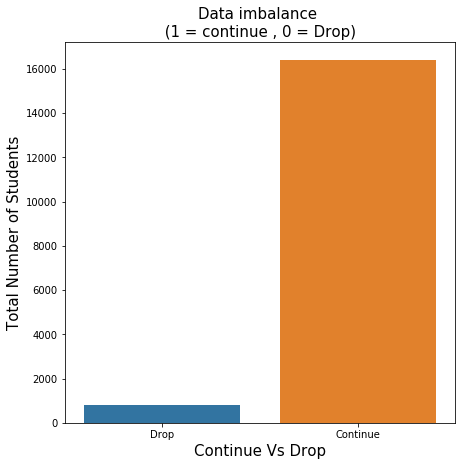

In [70]:
#visualizing how is data imbalance in column co

import seaborn as sns
plt.figure(figsize=(7,7))
sns.countplot(data=data, x='continue_drop')
plt.title("Data imbalance \n (1 = continue , 0 = Drop) ", fontsize = 15)
plt.xlabel("Continue Vs Drop", fontsize = 15);
plt.ylabel("Total Number of Students", fontsize = 15);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);

**The above diagram display the unbalanced data**

In [22]:
#handling imbalance class
majority = data[data['continue_drop']==1]
minority = data[data['continue_drop']==0]

In [23]:
#check the shape of majority class
majority.shape

(16384, 8)

In [24]:
# check the shape for minority class
minority.shape


(806, 8)

In [25]:
# get class counts 
count_1,count_0 = data['continue_drop'].value_counts()

In [26]:
# upsampling majority class
upsampled = minority.sample(count_1,replace=True)
upsampled.sample(4)

,continue_drop,gender,caste,english_marks,science_teacher,languages_teacher,guardian,internet
3741,0,1,0,0.947,6,3,2,1
11386,0,0,1,1.010,4,6,1,1
4067,0,0,3,0.317,6,7,2,1
474,0,0,1,1.010,4,6,1,1


In [27]:
data_balanced1 = pd.concat([upsampled,majority], axis = 0)

In [28]:
#down sapmle 
downsampled = majority.sample(count_1,random_state=100)

In [29]:
data_balanced = pd.concat([upsampled,downsampled], axis = 0)

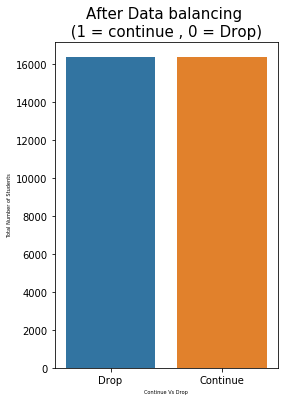

In [61]:
# Visualize the target column again 

import seaborn as sns
plt.figure(figsize=(4,6))
sns.countplot(data_balanced['continue_drop'])
plt.title("After Data balancing \n (1 = continue , 0 = Drop) ", fontsize = 15)
plt.xlabel("Continue Vs Drop", fontsize = 5);
plt.ylabel("Total Number of Students", fontsize = 5);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);

In [31]:
# check distributon of class again
data_balanced['continue_drop'].value_counts()

1    16384
0    16384
Name: continue_drop, dtype: int64

In [32]:
features = data.drop(['continue_drop'],axis=1)

In [33]:
features.head()

,gender,caste,english_marks,science_teacher,languages_teacher,guardian,internet
0,0,0,0.468,7,6,0,1
1,0,0,0.420,8,10,2,0
2,1,0,0.601,1,4,2,0
3,1,1,0.611,2,5,1,1
4,1,2,0.478,1,10,2,1


## 4. Training and Evaluation

### i) Data Splitting

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.30, random_state=42)

### ii) Model selection

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# defining the model with its associated parameters
from sklearn.neighbors import KNeighborsClassifier       
knn = KNeighborsClassifier(n_neighbors=5)               
knn.fit(x_train, y_train)                                

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### iii) Prediction

In [71]:
# predicting the new value
y_pred = knn.predict(x_test) 

### iv) Evalution Perfomance measure 
Using the following metrics
 - confusion matrix
 - f1 score


#### Confusion matrix

In [39]:
# using confusion matrix
from sklearn.metrics import confusion_matrix
jibu=confusion_matrix(y_test,y_pred)
jibu

array([[ 244,    0],
       [   0, 4913]], dtype=int64)

#### F1 score

In [40]:
# testing accuracy using f1_score
from sklearn.metrics import f1_score
f1_acc = f1_score(y_test,y_pred)
f1_acc

1.0

## 5. Testing

 - provided that we have another data set for testing, then we are going to use it for **testing**

In [41]:
#loading test data
data2=pd.read_csv('data/test_data_week_1_challenge.csv')

In [42]:
data2.head(2)

,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,s00529,F,BC,0.212,0.601,0.212,1,4,mother,False,341,430,44.0,1959.0
1,s13519,F,BC,0.511,0.551,0.511,1,5,mother,True,329,275,60.0,1914.0


In [44]:
data2['guardian'].unique()

array(['mother', 'father', 'other', 'mixed'], dtype=object)

In [45]:
data2['caste'].unique()

array(['BC', 'SC', 'OC', 'ST'], dtype=object)

In [46]:
data2['gender'].unique()

array(['F', 'M'], dtype=object)

In [47]:
data2['internet'].unique()

array([False,  True])

In [48]:
#converting boolean into numerical
data2=data2.replace({True:1,False:0})

In [49]:
data2['internet'].unique()

array([0, 1], dtype=int64)

In [50]:
data2=data2.replace({'BC':0,'ST':1,'SC':2,'OC':3})

In [51]:
data2=data2.replace({'F':1,'M':0})

In [52]:
data2=data2.replace({'other':0,'father':1,'mother':2,'mixed':3})

In [53]:
data2.dtypes

student_id             object
gender                  int64
caste                   int64
mathematics_marks     float64
english_marks         float64
science_marks         float64
science_teacher         int64
languages_teacher       int64
guardian                int64
internet                int64
school_id               int64
total_students          int64
total_toilets         float64
establishment_year    float64
dtype: object

In [54]:
data2.drop(['science_marks','mathematics_marks','school_id','establishment_year','total_students','total_toilets'], axis=1 ,inplace=True)


In [55]:
data2.drop(['student_id'],axis=1,inplace=True)

In [56]:
data2.head()

,gender,caste,english_marks,science_teacher,languages_teacher,guardian,internet
0,1,0,0.601,1,4,2,0
1,1,0,0.551,1,5,2,1
2,0,0,0.644,2,2,2,1
3,1,0,0.373,7,4,2,1
4,1,0,0.147,4,3,1,1


In [57]:
# pass test data for testing the model
test=knn.predict(data2)

In [58]:
test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [59]:
test=pd.DataFrame(test,columns=['predictions'])
test.head(3)

,predictions
0,1
1,1
2,1


## 6. Saving the model

In [72]:
test.to_csv('data/week-1-Challenge.npy')